In [1]:

import numpy as np
import matplotlib.pyplot as plt


k = 100.0
l = 0.2
b1 = 0.05
b2 = 0.1
b3 = 0.025
rho = 8000
cp = 400
h1 = 100
h2 = 100
h3 = 100
Q = 0
T0 = 200

km = np.array([[((-k*b1/l)-h1*l)/(rho*l*b1*cp),(k*b1/l)/(rho*l*b1*cp),0],[(k*b1/l)/(rho*l*b2*cp),(-(k*b1/l)-(k*b3/l)-h2*l)/(rho*l*b2*cp),(k*b3/l)/(rho*l*b2*cp)],[0,(k*b3/l)/(rho*l*b3*cp),(-(k*b3/l)-h3*l)/(rho*l*b3*cp)]])
# km = km + (Q/(rho*l*cp))*np.array([[1/b1],[1/b2],[1/b3]])

lambdas = np.linalg.eig(km)[0]
vectors = np.linalg.eig(km)[1]

lambda1 = lambdas[0]
lambda2 = lambdas[1]
lambda3 = lambdas[2]

vector1 = vectors[:,0]
vector2 = vectors[:,1]
vector3 = vectors[:,2]

print(km)
t = np.linspace(0,1000,1000)

plt.figure(1,figsize=(10,10))
plt.plot(t,T0*np.exp(lambda1*t),color ='red',label = 'T1(t)')
plt.scatter(600,T0*np.exp(lambda1*600),color = 'red',label = 'T1(600)')
plt.plot(t,T0*np.exp(lambda2*t),color ='blue',label = 'T2(t)')
plt.scatter(600,T0*np.exp(lambda2*600),color = 'blue',label = 'T2(600)')
plt.plot(t,T0*np.exp(lambda3*t),color ='green',label = 'T3(t)')
plt.scatter(600,T0*np.exp(lambda3*600),color = 'green',label = 'T3(600)')
plt.title('Comportamiento térmico')
plt.xlabel('tiempo [s]')
plt.ylabel('Temp [°C]')
plt.legend(loc = 0)

print('T1(600) = ',T0*np.exp(lambda1*600))
print('T2(600) = ',T0*np.exp(lambda2*600))
print('T3(600) = ',T0*np.exp(lambda3*600))




[[-0.00140625  0.00078125  0.        ]
 [ 0.00039063 -0.00089844  0.00019531]
 [ 0.          0.00078125 -0.00203125]]
T1(600) =  150.55073896627397
T2(600) =  73.67429916548994
T3(600) =  53.48682811977579


delta 1-2 =  69.48313875226762
delta 1-3 =  59.485144710583306
delta 2-3 =  9.997994041684322


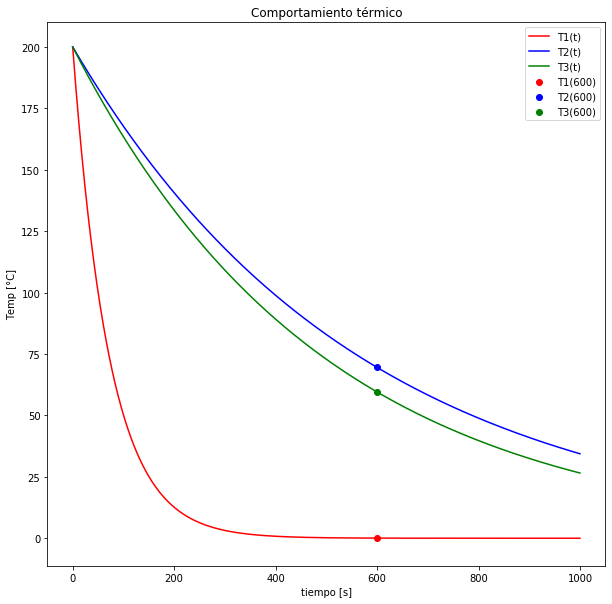

In [2]:

k = 100.0
l = 0.2
b1 = 0.05
b2 = 0.1
b3 = 0.025
rho = 8000.0
cp = 400.0
h1 = 1
h2 = 1
h3 = 100.0 # fijo
Q = 0
T0 = 200

km = np.array([[((-k*b1/l)-h1*l)/(rho*l*b1*cp),(k*b1/l)/(rho*l*b1*cp),0],[(k*b1/l)/(rho*l*b2*cp),(-(k*b1/l)-(k*b3/l)-h2*l)/(rho*l*b2*cp),(k*b3/l)/(rho*l*b2*cp)],[0,(k*b3/l)/(rho*l*b3*cp),(-(k*b3/l)-h3*l)/(rho*l*b3*cp)]])
# km = km + (Q/(rho*l*cp))*np.array([[1/b1],[1/b2],[1/b3]])

lambdas = np.linalg.eig(km)[0]
vectors = np.linalg.eig(km)[1]

lambda1 = lambdas[0]
lambda2 = lambdas[1]
lambda3 = lambdas[2]

vector1 = vectors[:,0]
vector2 = vectors[:,1]
vector3 = vectors[:,2]

t = np.linspace(0,1000,1000)
dT12 = abs(T0*np.exp(lambda1*600)-T0*np.exp(lambda2*600))
dT13 = abs(T0*np.exp(lambda1*600)-T0*np.exp(lambda3*600))
dT23 = abs(T0*np.exp(lambda2*600)-T0*np.exp(lambda3*600))

cto = 1
while(dT23>10):
    km = np.array([[((-k*b1/l)-h1*l)/(rho*l*b1*cp),(k*b1/l)/(rho*l*b1*cp),0],[(k*b1/l)/(rho*l*b2*cp),(-(k*b1/l)-(k*b3/l)-h2*l)/(rho*l*b2*cp),(k*b3/l)/(rho*l*b2*cp)],[0,(k*b3/l)/(rho*l*b3*cp),(-(k*b3/l)-h3*l)/(rho*l*b3*cp)]])
    # km = km + (Q/(rho*l*cp))*np.array([[1/b1],[1/b2],[1/b3]])

    lambdas = np.linalg.eig(km)[0]
    vectors = np.linalg.eig(km)[1]

    lambda1 = lambdas[0]
    lambda2 = lambdas[1]
    lambda3 = lambdas[2]

    vector1 = vectors[:,0]
    vector2 = vectors[:,1]
    vector3 = vectors[:,2]

    t = np.linspace(0,1000,1000)
    dT12 = abs(T0*np.exp(lambda1*600)-T0*np.exp(lambda2*600))
    dT13 = abs(T0*np.exp(lambda1*600)-T0*np.exp(lambda3*600))
    dT23 = abs(T0*np.exp(lambda2*600)-T0*np.exp(lambda3*600))
    h2 = h2+10
    
    if h2 >= 10000:
        h2 = 1
        h1 = h1+10
    if h1 > 10000:
        break


plt.figure(1,figsize=(10,10))
plt.plot(t,T0*np.exp(lambda1*t),color ='red',label = 'T1(t)')
plt.scatter(600,T0*np.exp(lambda1*600),color = 'red',label = 'T1(600)')
plt.plot(t,T0*np.exp(lambda2*t),color ='blue',label = 'T2(t)')
plt.scatter(600,T0*np.exp(lambda2*600),color = 'blue',label = 'T2(600)')
plt.plot(t,T0*np.exp(lambda3*t),color ='green',label = 'T3(t)')
plt.scatter(600,T0*np.exp(lambda3*600),color = 'green',label = 'T3(600)')
plt.title('Comportamiento térmico')
plt.xlabel('tiempo [s]')
plt.ylabel('Temp [°C]')
plt.legend(loc = 0)




print('delta 1-2 = ',dT12)
print('delta 1-3 = ',dT13)
print('delta 2-3 = ',dT23)



T1(600) =  [61.81157629]
T2(600) =  [157.90712604]
T3(600) =  [183.14146485]


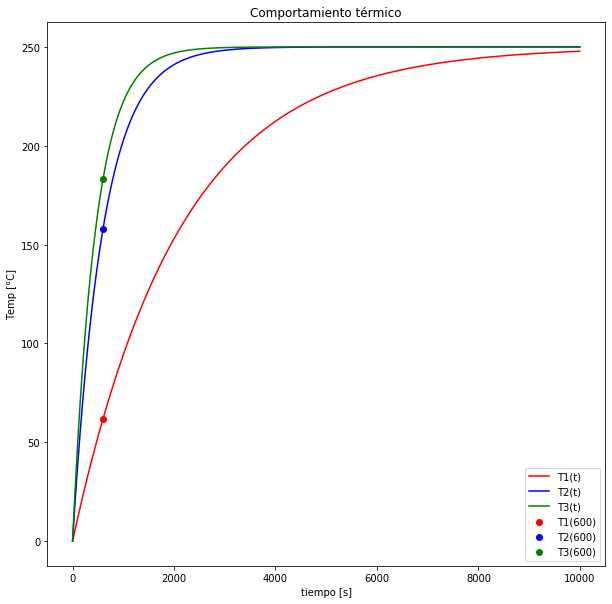

In [35]:
import numpy as np
import matplotlib.pyplot as plt


k = 100.0
l = 0.2
b1 = 0.05
b2 = 0.1
b3 = 0.025
rho = 8000
cp = 400
h1 = 100
h2 = 100
h3 = 100
Q = 5e3
T0 = -250

km = np.array([[((-k*b1/l)-h1*l)/(rho*l*b1*cp),(k*b1/l)/(rho*l*b1*cp),0],[(k*b1/l)/(rho*l*b2*cp),(-(k*b1/l)-(k*b3/l)-h2*l)/(rho*l*b2*cp),(k*b3/l)/(rho*l*b2*cp)],[0,(k*b3/l)/(rho*l*b3*cp),(-(k*b3/l)-h3*l)/(rho*l*b3*cp)]])
Q = np.array([[Q/(rho*l*cp*b1)],[Q/(rho*l*cp*b2)],[Q/(rho*l*cp*b3)]])
theta_gorro = -np.linalg.solve(km,Q)

lambdas = np.linalg.eig(km)[0]
vectors = np.linalg.eig(km)[1]

lambda1 = lambdas[0]
lambda2 = lambdas[1]
lambda3 = lambdas[2]

vector1 = vectors[:,0]
vector2 = vectors[:,1]
vector3 = vectors[:,2]

# print(km)
t = np.linspace(0,10000,1000)

T1 = T0*np.exp(lambda1*t)+theta_gorro[0]
T2 = T0*np.exp(lambda2*t)+theta_gorro[1]
T3 = T0*np.exp(lambda3*t)+theta_gorro[2]

plt.figure(1,figsize=(10,10))
plt.plot(t,T1,color ='red',label = 'T1(t)')
plt.scatter(600,T0*np.exp(lambda1*600)+theta_gorro[0],color = 'red',label = 'T1(600)')
plt.plot(t,T2,color ='blue',label = 'T2(t)')
plt.scatter(600,T0*np.exp(lambda2*600)+theta_gorro[1],color = 'blue',label = 'T2(600)')
plt.plot(t,T3,color ='green',label = 'T3(t)')
plt.scatter(600,T0*np.exp(lambda3*600)+theta_gorro[2],color = 'green',label = 'T3(600)')
plt.title('Comportamiento térmico')
plt.xlabel('tiempo [s]')
plt.ylabel('Temp [°C]')
plt.legend(loc = 0)

print('T1(600) = ',T0*np.exp(lambda1*600)+theta_gorro[0])
print('T2(600) = ',T0*np.exp(lambda2*600)+theta_gorro[1])
print('T3(600) = ',T0*np.exp(lambda3*600)+theta_gorro[2])


In [12]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [17]:
print(km)

[[-0.00140625  0.00078125  0.        ]
 [ 0.00039063 -0.00089844  0.00019531]
 [ 0.          0.00078125 -0.00203125]]


In [24]:
print(np.linalg.inv(km))
print(Q)
print(-np.dot(np.linalg.inv(km),Q))

[[ -965.63876652  -916.29955947   -88.10572687]
 [ -458.14977974 -1649.33920705  -158.59030837]
 [ -176.21145374  -634.36123348  -553.30396476]]
[[0.15625 ]
 [0.078125]
 [0.3125  ]]
[[250.]
 [250.]
 [250.]]
